In [30]:
import random
import math
from itertools import product

## Algorithm implemetation
matrix_multiplication method realises multiplication operation for two boolean (filled with 0 or 1 only) matrices. four_russian_multiplication does the same operation, but it uses precomputed matrix k to reduce complexity by replacement multiplication operation with simple searching of precomputed value.

In [34]:
'''
Generates square matrix of size n filled with zeros
'''
def make_empty_matrix(n):
    return [[0 for i in range(n)] for j in range(n)]

'''
Generates random square matrix of size n filled with 1 and 0
'''
def make_random_matrix(n):
    return [[random.choice([0,1]) for i in range(n)] for j in range(n)]

'''
Does multiplication modulo 2
'''
def mult(a, b):
    return (a * b) % 2

'''
Sums up values in given array modulo 2
'''
def array_sum(array):
    res = 0
    
    for el in array:
        res += el
        
    return res % 2

'''
Gets scalar product for two given arrays
'''
def array_mult(a, b):
    return array_sum([mult(a[i], b[i]) for i in range(len(a))])

'''
Realises matrix multiplication operation for given matrices
'''
def matrix_multiplication(A, B):
    n = len(A)
    res = make_empty_matrix(n)
    
    for row in range(n):
        string = A[row]
        
        for col in range(n):
            column = [B[i][col] for i in range(n)]
            res[row][col] = array_mult(string, column)
        
    return res

'''
Splits given matrix rows into subrows of length k
If needed, zero columns added to the end of the matrix to make k be divider for number of cols
'''
def split_matrix_into_subrows(M, k):
    n = len(M)
    add_cols = 0
    res = []
    
    for r in range(n):
        row = [tuple(M[r][col:col+k]) for col in range(0, n, k)]
        last_len = len(row[-1])
        
        if add_cols:
            row[-1] = row[-1] + tuple([0 for i in range(add_cols)])
        
        elif last_len < k:
            add_cols = k - last_len
            row[-1] = row[-1] + tuple([0 for i in range(add_cols)])
        
        res.append(row)
    
    return res

'''
Transposes given matrix
'''
def transpose(M):
    rows = len(M)
    cols = len(M[0])
    return [[M[col][row] for col in range(rows)] for row in range(cols)]

'''
Realises four russians algorithm for matrices multiplication
'''
def four_russian_multiplication(A, B, k):
    # Generate k_matrix
    substrings = list(product([0, 1], repeat=k))
    k_matrix = {}
    
    for row in substrings:
        k_matrix[row] = {}
        
        for col in substrings:
            k_matrix[row][col] = array_mult(row, col)
    
    # Generate A' and B' matrices
    n = len(A)
    A_splt = split_matrix_into_subrows(A, k)
    B_splt = split_matrix_into_subrows(transpose(B), k)
    
    # Do multiplication with A', B'
    res = make_empty_matrix(n)
    
    for r in range(n):
        row = A_splt[r]
        
        for c in range(n):
            column = B_splt[c]
            res[r][c] = array_sum([k_matrix[row[i]][column[i]] for i in range(n // k)])
            
    return res

## Simple test
Let's test both methods on simple example from this page: https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%87%D0%B5%D1%82%D1%8B%D1%80%D1%91%D1%85_%D1%80%D1%83%D1%81%D1%81%D0%BA%D0%B8%D1%85_%D0%B4%D0%BB%D1%8F_%D1%83%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86

In [37]:
A = [
    [0, 1, 1, 1],
    [0, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 0, 0, 1]
]
B = [
    [1, 0, 0, 1],
    [0, 0, 1, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1]
]

C_st = matrix_multiplication(A, B)
C_fr = four_russian_multiplication(A, B, 2)

print('Standart algorithm result:')
for row in C_st: 
    print(row)

print('\nFour russians algorithm result:')
for row in C_fr: 
    print(row)

Standart algorithm result:
[1, 1, 0, 0]
[0, 0, 1, 1]
[1, 1, 1, 1]
[1, 1, 0, 0]

Four russians algorithm result:
[1, 1, 0, 0]
[0, 0, 1, 1]
[1, 1, 1, 1]
[1, 1, 0, 0]


## Algorithms comparison
Below some time tests for realised algorithms provided

In [40]:
import time

standart_times = []
fr_times = []

for n in range(100, 1000, 100):
    A, B = (make_random_matrix(n) for i in range(2))
    k = round(math.log(n))
    
    st_start = time.time()
    res = matrix_multiplication(A, B)
    st_finish = time.time()
    standart_times.append(st_finish - st_start)
    
    fr_start = time.time()
    res = four_russian_multiplication(A, B, k)
    fr_finish = time.time()
    fr_times.append(fr_finish - fr_start)
    
    print(f'size {n} is ready...')

size 100 is ready...
size 200 is ready...
size 300 is ready...
size 400 is ready...
size 500 is ready...
size 600 is ready...
size 700 is ready...
size 800 is ready...
size 900 is ready...


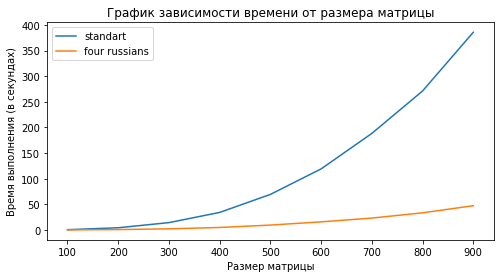

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

x = [x for x in range(100, 1000, 100)]
ax.plot(x, standart_times, label='standart')
ax.plot(x, fr_times, label='four russians')

ax.set_xlabel('Размер матрицы')
ax.set_ylabel('Время выполнения (в секундах)')
ax.set_title('График зависимости времени от размера матрицы')
ax.legend()

plt.show()